In [182]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [33]:
data = pd.read_csv('edf04052023V1.csv', sep=',')
data.head()

,Date,Heure,euros,kWh
0,4/28/2024,0:00:00,0.66,3.15
1,4/28/2024,0:30:00,0.66,3.13
2,4/28/2024,1:00:00,0.67,3.16
3,4/28/2024,1:30:00,0.59,2.78
4,4/28/2024,2:00:00,0.43,2.02


In [300]:
extrait28Avril = data.iloc[:48]
extrait28Avril.head()

,Date,Heure,euros,kWh
0,4/28/2024,0:00:00,0.66,3.15
1,4/28/2024,0:30:00,0.66,3.13
2,4/28/2024,1:00:00,0.67,3.16
3,4/28/2024,1:30:00,0.59,2.78
4,4/28/2024,2:00:00,0.43,2.02


In [143]:
extrait29Avril = data[48:96]
extrait29Avril.tail()
print(len(extrait29Avril['kWh']))

48


In [153]:
def calculCout(df, depart, nbjour):
    cout = 0
    for depart in range(depart,len(df['euros'])*nbjour):
        cout += df['euros'][depart]
    return cout

In [154]:
def moyenne_kWh(df, depart, nbjour):
    somme = 0
    for depart in range(depart,len(df['kWh'])*nbjour):
        somme += df['kWh'][depart]
    return somme / 24

In [155]:
def somme_kWh(df, depart,nbjour):
    somme = 0
    for depart in range(depart, len(df['kWh'])*nbjour):
        somme += df['kWh'][depart]
    return somme

### Cout du 28 avril en electricité et moyenne en kw/h

In [156]:
cout28Avril = calculCout(extrait28Avril, depart=0, nbjour=1)
print("Le coût est de ",  cout28Avril,  "€")

Le coût est de  8.81 €


In [157]:
moyenne_kWh_28Avril = moyenne_kWh(extrait28Avril, depart=0, nbjour=1)
print("La moyenne de kWh est de ",moyenne_kWh_28Avril)

La moyenne de kWh est de  1.538333333333333


In [158]:
somme_kWh28Avril = somme_kWh(extrait28Avril, depart=0, nbjour=1)
print("La somme en kWh sur une journée est de ", somme_kWh28Avril)

La somme en kWh sur une journée est de  36.919999999999995


### Cout du 29 avril en electricité et moyenne en kw/h

In [159]:
cout29Avril = calculCout(extrait29Avril, depart=48, nbjour=2)
print("Le coût est de ",  cout29Avril,  "€")

Le coût est de  6.799999999999996 €


In [160]:
moyenne_kWh_29Avril = moyenne_kWh(extrait29Avril, depart=48, nbjour=2)
print("La moyenne de kWh est de ",moyenne_kWh_29Avril)

La moyenne de kWh est de  1.169583333333333


In [161]:
somme_kWh29Avril = somme_kWh(extrait29Avril,depart=48, nbjour=2)
print("La somme en kWh sur une journée est de ", somme_kWh29Avril)

La somme en kWh sur une journée est de  28.069999999999993


### Calcul de la moyenne des moyennes et des sommes

In [162]:
moyenne_moy = (moyenne_kWh_28Avril + moyenne_kWh_29Avril)/2
moyenne_som = (somme_kWh28Avril + somme_kWh29Avril)/2

print("La moyenne des moyennes est de ",moyenne_moy, "et la moyennes des sommes en kWh est de ", moyenne_som)

La moyenne des moyennes est de  1.353958333333333 et la moyennes des sommes en kWh est de  32.49499999999999


## Pour Plot:

In [307]:
def plotHeure_kWh_Extrait(df):
    heure = df['Heure']
    kWh = df['kWh']

    plt.figure(figsize=(40,10))
    plt.plot(heure,kWh)
    plt.xlabel('Heures', fontsize=20)
    plt.ylabel("kWh", fontsize=20)
    plt.xticks(np.arange(len(df['Heure']))[: : 2]) # a commenter pour voir toute les 30 min et changer la figsize a (80,25)
    plt.xticks(fontsize=18)
    plt.yticks(fontsize=18)
    plt.title("kWh consomé par heure", fontsize=30)    
    plt.show()

In [310]:
def plotHeure_euros_Extrait(df):
    heure = df['Heure']
    kWh = df['euros']

    plt.figure(figsize=(40,10))
    plt.plot(heure,kWh)
    plt.xlabel("Heure", fontsize=20)
    plt.ylabel("Euros", fontsize=20)
    plt.xticks(np.arange(len(df['Heure']))[: : 2]) # a commenter pour voir toute les 30 min et changer la figsize a (80,25)
    plt.xticks(fontsize=18)
    plt.yticks(fontsize=18)
    plt.title("Coût en euros par heure", fontsize=30)
    plt.show()

### Plot des kWh par horaire le 28 avril

In [242]:
#extrait28Avril['euros'].plot(kind='bar', xlabel='heure28Avril', ylabel='euros(€)', figsize=(8,4))

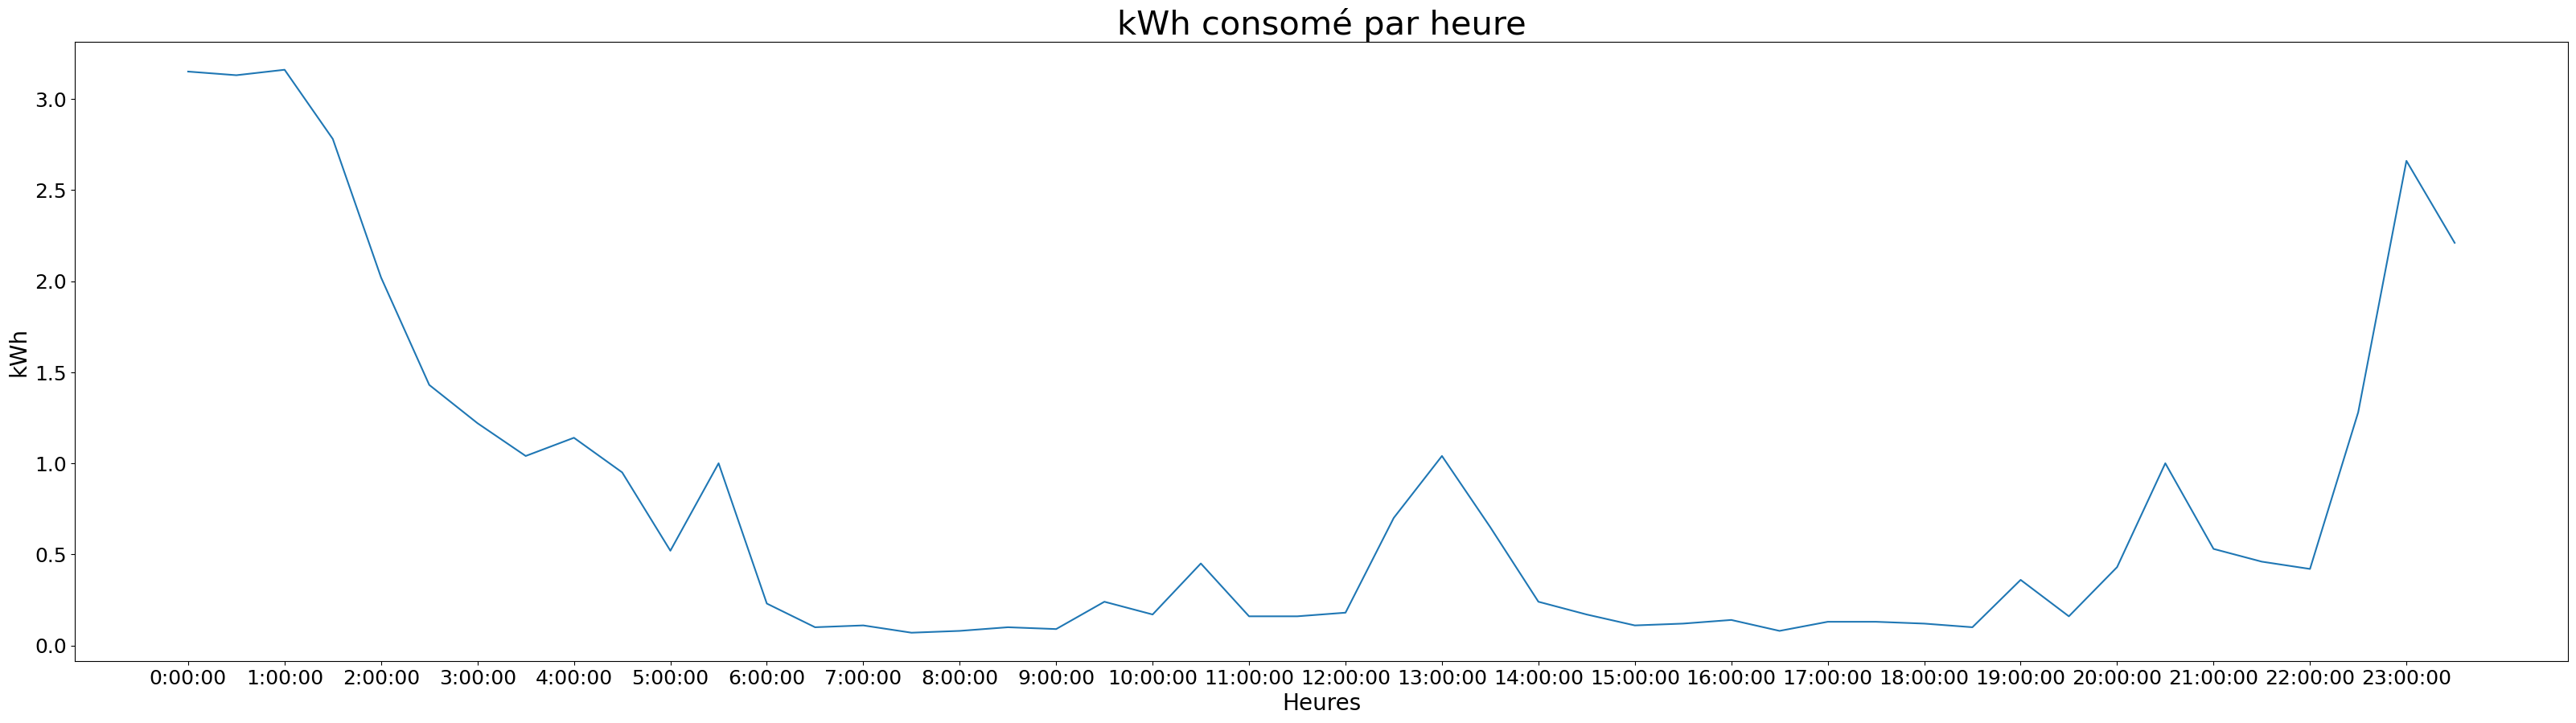

In [308]:
plotHeure_kWh_Extrait(extrait28Avril)


### Plot des euros par horaire le 28 avril

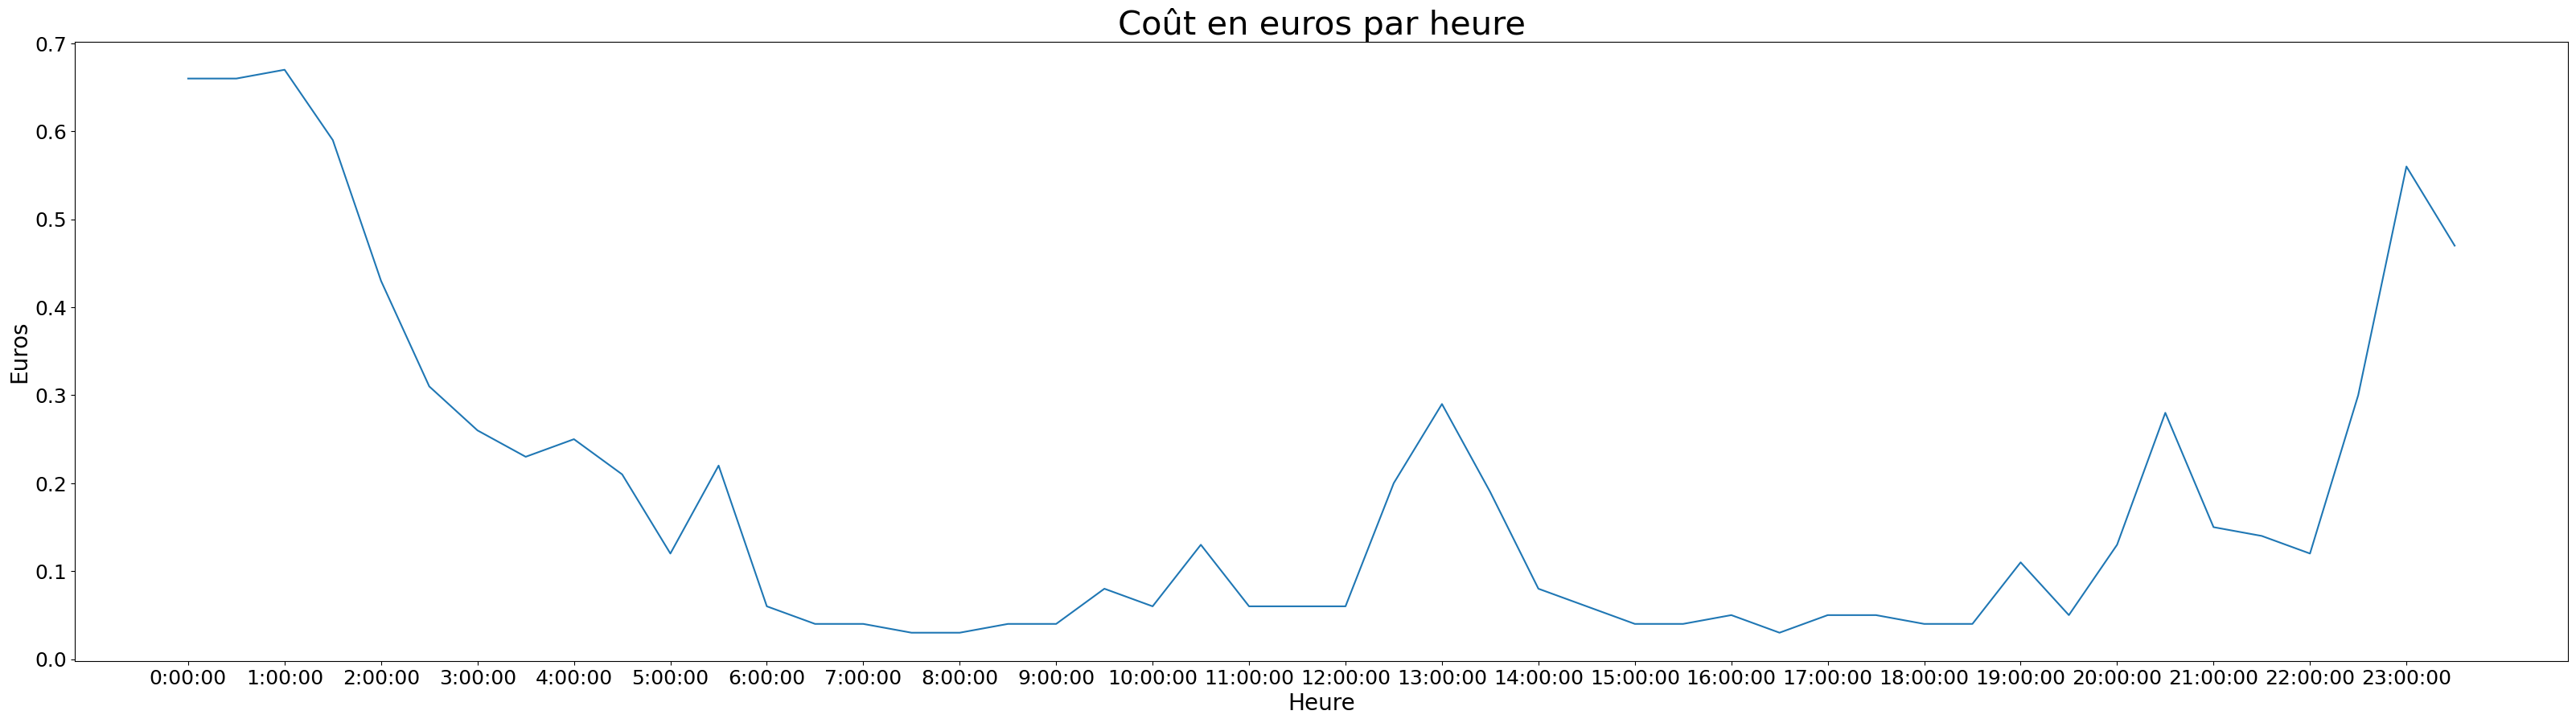

In [311]:
#En histograme si besoin
#extrait28Avril['euros'].plot(kind='hist', xlabel='fréquence', ylabel='euros(€)', figsize=(8,4))
plotHeure_euros_Extrait(extrait28Avril)

### Plot des kWh du 29 avril

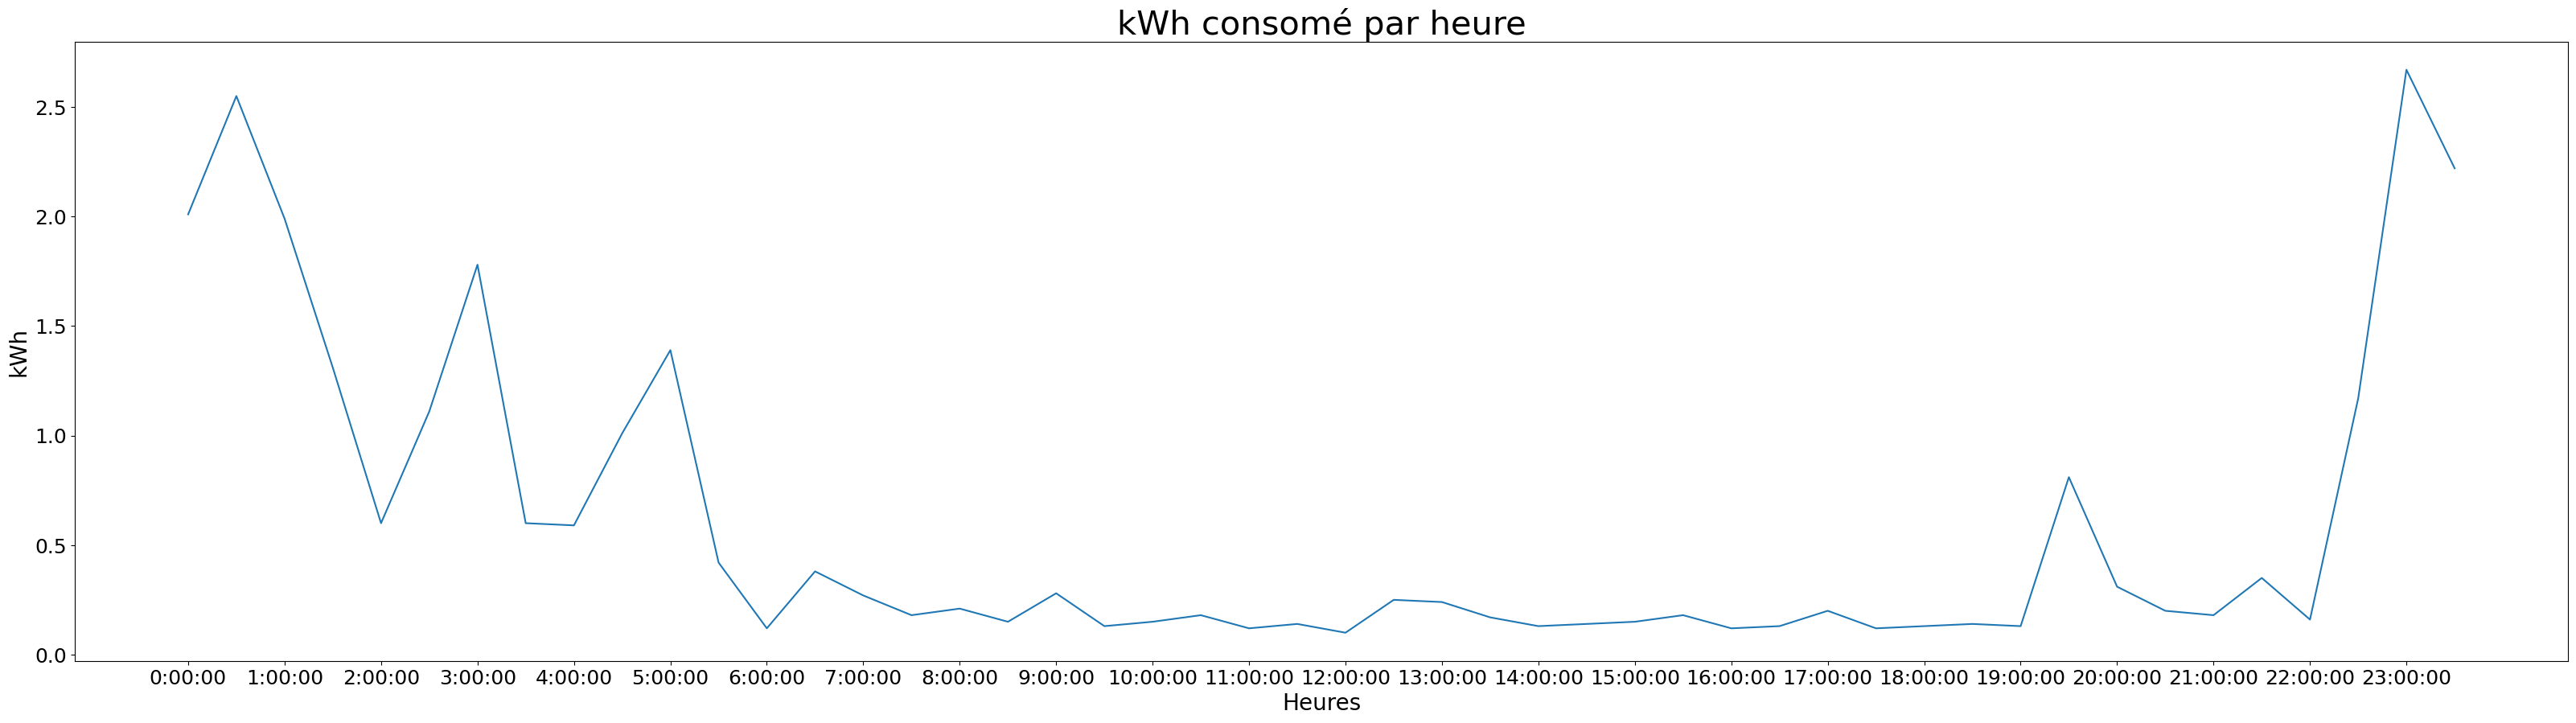

In [309]:
plotHeure_kWh_Extrait(extrait29Avril)

#extrait29Avril['euros'].plot(kind='bar', xlabel='fréquence', ylabel='euros(€)', figsize=(8,4))

### Plot des euros par horaire le 28 avril

In [192]:
#En histograme si besoin
#extrait29Avril['euros'].plot(kind='hist', xlabel='fréquence', ylabel='euros(€)', figsize=(8,4))

In [218]:
#extrait29Avril['euros'].plot(kind='bar', xlabel='fréquence', ylabel='euros(€)', figsize=(8,4))

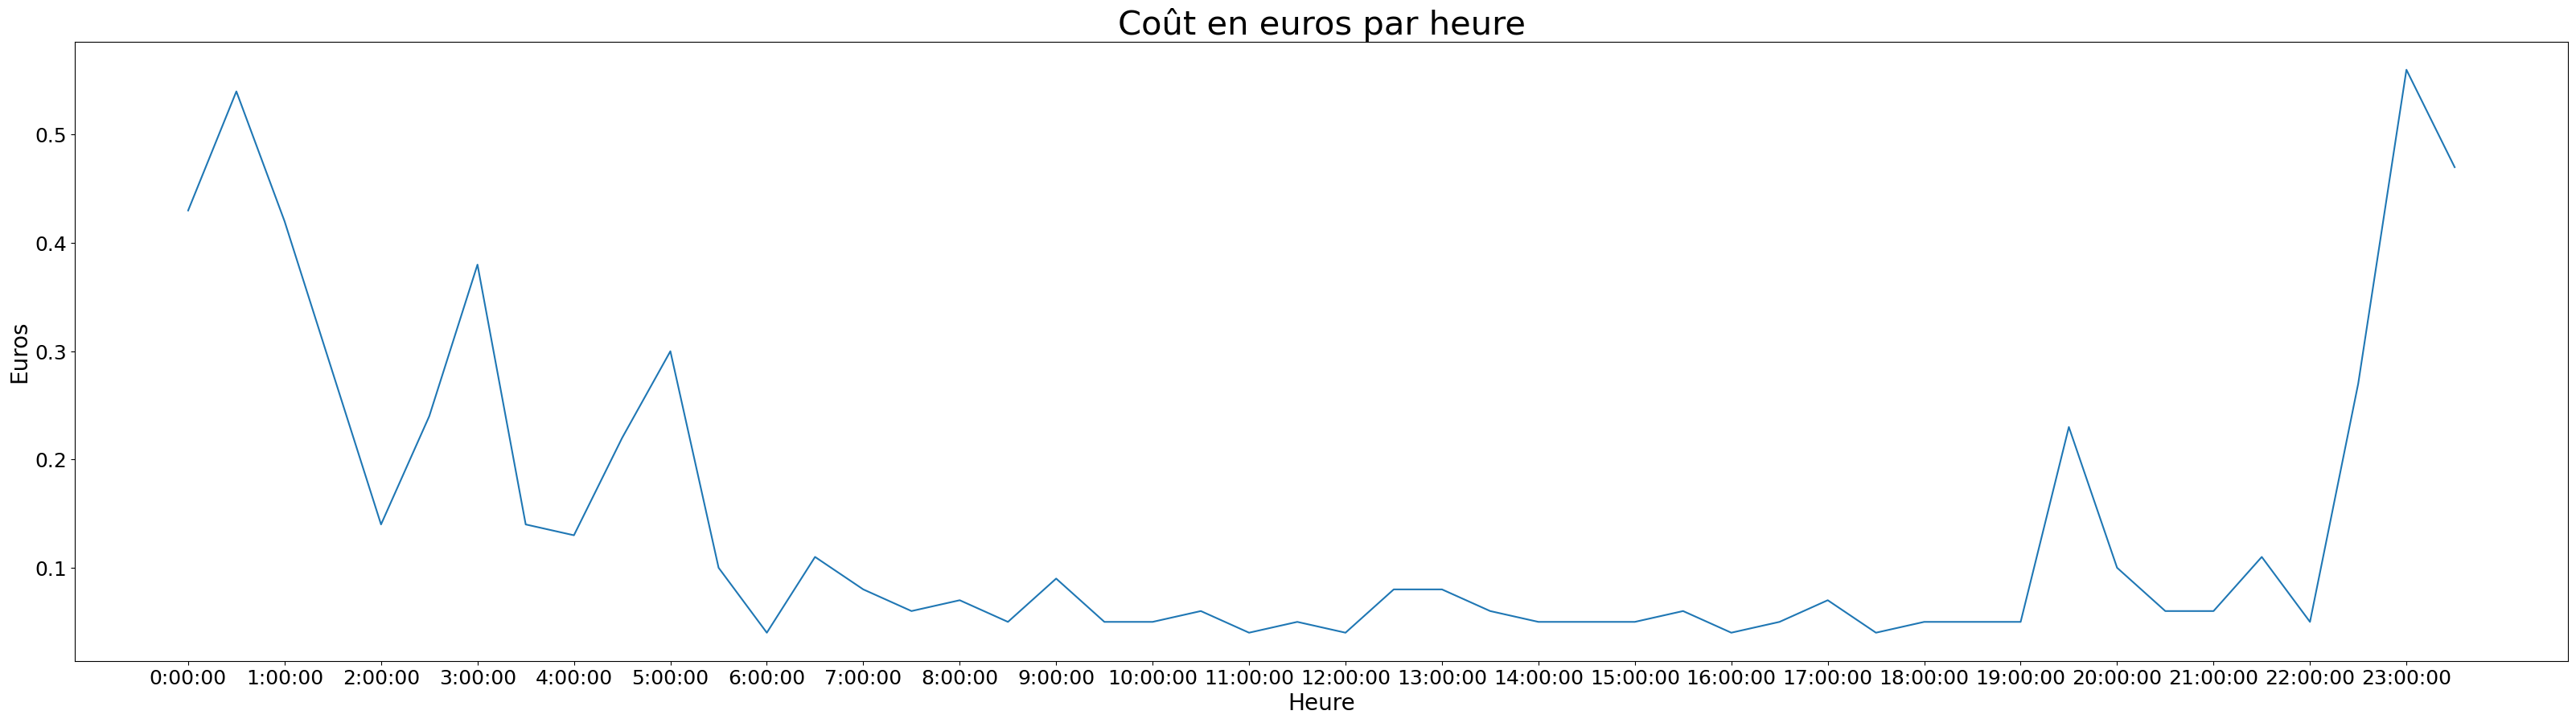

In [312]:
plotHeure_euros_Extrait(extrait29Avril)

### Concaténation des graphiques

In [328]:
def dateur(df, date, temps):
    df['DateTime'] = pd.to_datetime(df[date] + "" + df[temps], format='%m/%d/%Y%H:%M:%S')


In [347]:
extrait28_29 = data[:96]
dateur(df=extrait28_29, date='Date', temps='Heure')
extrait28_29.tail()

/tmp/ipykernel_4399/2256412604.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['DateTime'] = pd.to_datetime(df[date] + "" + df[temps], format='%m/%d/%Y%H:%M:%S')


,Date,Heure,euros,kWh,DateTime
91,4/29/2024,21:30:00,0.11,0.35,2024-04-29 21:30:00
92,4/29/2024,22:00:00,0.05,0.16,2024-04-29 22:00:00
93,4/29/2024,22:30:00,0.27,1.17,2024-04-29 22:30:00
94,4/29/2024,23:00:00,0.56,2.67,2024-04-29 23:00:00
95,4/29/2024,23:30:00,0.47,2.22,2024-04-29 23:30:00


In [329]:
dateur(df=extrait28Avril, date='Date', temps='Heure')
data.head()

/tmp/ipykernel_4399/2256412604.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['DateTime'] = pd.to_datetime(df[date] + "" + df[temps], format='%m/%d/%Y%H:%M:%S')


,Date,Heure,euros,kWh,DateTime
0,4/28/2024,0:00:00,0.66,3.15,2024-04-28 00:00:00
1,4/28/2024,0:30:00,0.66,3.13,2024-04-28 00:30:00
2,4/28/2024,1:00:00,0.67,3.16,2024-04-28 01:00:00
3,4/28/2024,1:30:00,0.59,2.78,2024-04-28 01:30:00
4,4/28/2024,2:00:00,0.43,2.02,2024-04-28 02:00:00


In [330]:
dateur(df=extrait29Avril, date='Date', temps='Heure')
data.head()

/tmp/ipykernel_4399/2256412604.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['DateTime'] = pd.to_datetime(df[date] + "" + df[temps], format='%m/%d/%Y%H:%M:%S')


,Date,Heure,euros,kWh,DateTime
0,4/28/2024,0:00:00,0.66,3.15,2024-04-28 00:00:00
1,4/28/2024,0:30:00,0.66,3.13,2024-04-28 00:30:00
2,4/28/2024,1:00:00,0.67,3.16,2024-04-28 01:00:00
3,4/28/2024,1:30:00,0.59,2.78,2024-04-28 01:30:00
4,4/28/2024,2:00:00,0.43,2.02,2024-04-28 02:00:00


(0.0, 1.0)


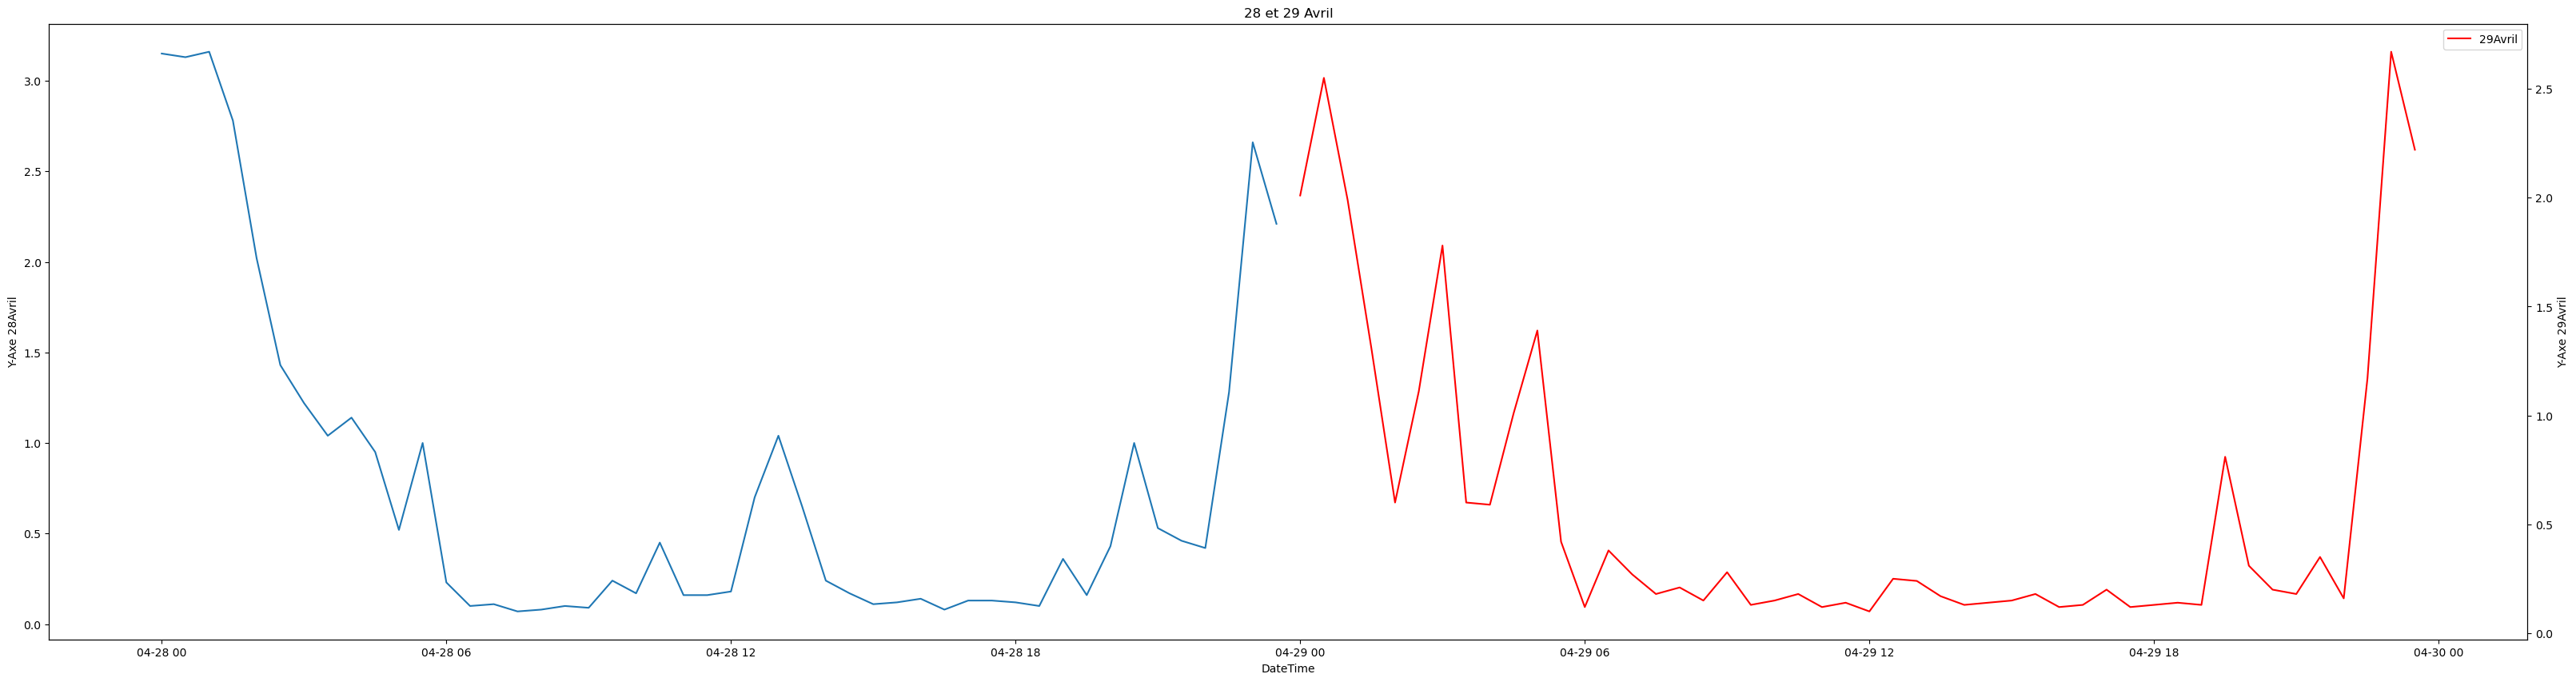

In [353]:
x1 = extrait28Avril["DateTime"]
y1 = extrait28Avril["kWh"]

x2 = extrait29Avril["DateTime"]
y2 = extrait29Avril["kWh"]

fig, ax1 = plt.subplots(figsize=(40,10))
#plt..xticks(np.arange(0, len(extrait28_29), step=1))
print(ax1.get_xbound())
ax1.plot(x1, y1, label='28Avril')
ax2 = ax1.twinx()

ax2.plot(x2, y2, label='29Avril', color='red')

ax1.set_xlabel('DateTime')
ax1.set_ylabel('Y-Axe 28Avril')
ax2.set_ylabel('Y-Axe 29Avril')
plt.title('28 et 29 Avril')
plt.legend()
plt.show()



